

> # Preprocessing Data


In [1]:
!pip install nltk pandas sastrawi


In [2]:
import pandas as pd
from IPython.display import display

# Load the dataset
file_path = "comments_data.csv"
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data in a tabular format

display(data.head())


,Timestamp,Username,VideoID,Comment,Date
0,2025-04-07T16:03:13Z,@mochamedadama2567,qlKDYBZysoc,"2025, Infinix note 50",2025-04-07T16:03:13Z
1,2025-03-29T18:07:25Z,@EkomargoriskiEkomargoriski,qlKDYBZysoc,Setia,2025-03-29T18:07:25Z
2,2025-01-29T13:36:05Z,@afdhalaljibran1845,qlKDYBZysoc,pengguna 3 tahun yang lalu hadir nih wkwk awet...,2025-01-29T13:36:05Z
3,2024-11-08T09:38:37Z,@belutwakwaw1017,qlKDYBZysoc,Nonton 2024 dulu 3 jutaan skrang dbwah 2 jutaa...,2024-11-08T09:38:37Z
4,2024-10-05T09:25:10Z,@donypras6150,qlKDYBZysoc,Mendang mending TECNO,2024-10-05T09:25:10Z


In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
import string
from IPython.display import display

# Ensure the essential resources are downloaded (only punkt and stopwords)
nltk.download('punkt')
nltk.download('stopwords')
# Download the 'punkt_tab' resource for English sentence tokenization
nltk.download('punkt_tab') # This line downloads the required resource


# Initialize Sastrawi Stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

slang_dict = {
    'wkwk': 'tertawa',
    'dbwah': 'dibuang',
    'skrang': 'sekarang',
    'jutaaan': 'jutaan',
    'gpp': 'tidak apa-apa',
    'moga': 'semoga',
    'trima': 'terima',
    'bgt': 'banget',
    'jdi': 'jadi',
    'tmn': 'teman',
    'bg': 'bang',
    'batre': 'baterai',
    'hp': 'handphone',
    'kek': 'seperti',
    'gk': 'tidak',
    'ga': 'tidak',
    'jg': 'juga',
    'udh': 'sudah',
    'blm': 'belum',
    'ny': 'nya',
    'aja': 'saja',
    'nih': 'ini',
    'tp': 'tapi',
    'sm': 'sama',
    'dr': 'dari',
    'bnyk': 'banyak',
    'yg': 'yang',
    'ane': 'saya',
    'lu': 'kamu',
    'bro': 'saudara',
    'gan': 'kawan',
    'plis': 'tolong',
    'mantap': 'hebat',
    'mending': 'lebih baik',
    'mantul': 'mantap betul',
    'ngegame': 'bermain game',
    'gonjreng': 'terang',
    'kudu': 'harus',
    'keknya': 'sepertinya',
    'ngeframe': 'lag',
    'ngumpulin': 'mengumpulkan',
    'nonton': 'menonton',
    'ngojol': 'ojek online',
    'rame': 'ramai',
    'ramein': 'meramaikan',
    'boros': 'cepat habis',
    'irit': 'hemat',
    'brutal': 'kasar',
    'review': 'ulasan',
    'rekomendasi': 'saran',
    'speck': 'spesifikasi',
    'streo': 'stereo',
    'spiker': 'speaker',
    'vc': 'video call',
    'gimmick': 'tipuan',
    'lawak': 'lucu',
    'bismillah': 'dengan nama Allah',
    'masak': 'masa',
    'izin': 'meminta izin',
    'otw': 'dalam perjalanan',
    'njir': 'ekspresi kaget',
    'rekomend': 'saran'
}


# Function to replace slang words
def handle_numbers_and_slang(text):
    if text is None or pd.isna(text):  # Handle NoneType or NaN values
        return ''
    for slang, replacement in slang_dict.items():
        text = text.replace(slang, replacement)
    return text

# Step 1: Case Folding
def case_folding(text):
    if text is None or pd.isna(text):  # Handle NoneType or NaN values
        return ''
    return text.lower()

# Step 2: Remove Special Characters
def remove_special_characters(text):
    if text is None or pd.isna(text):  # Handle NoneType or NaN values
        return ''
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Step 3: Remove Stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('indonesian'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

# Step 4: Stemming
def stemming(text):
    return stemmer.stem(text)

# Step 5: Tokenization
def tokenize(text):
    return word_tokenize(text)

# Apply preprocessing steps to the 'Comment' column
data['processed_text'] = data['Comment'].apply(lambda x: case_folding(x))  # Apply case folding
data['processed_text'] = data['processed_text'].apply(lambda x: remove_special_characters(x))  # Remove special characters
data['processed_text'] = data['processed_text'].apply(lambda x: remove_stopwords(x))  # Remove stopwords
data['processed_text'] = data['processed_text'].apply(lambda x: stemming(x))  # Apply stemming

# Tokenize the text
data['tokens'] = data['processed_text'].apply(lambda x: tokenize(x))


# Show the first few rows with the preprocessed text and tokens
display(data[['Comment', 'processed_text', 'tokens']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rizal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rizal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rizal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Comment,processed_text,tokens
0,"2025, Infinix note 50",infinix note,"[infinix, note]"
1,Setia,setia,[setia]
2,pengguna 3 tahun yang lalu hadir nih wkwk awet...,guna hadir nih wkwk awet cas kenceng batre awe...,"[guna, hadir, nih, wkwk, awet, cas, kenceng, b..."
3,Nonton 2024 dulu 3 jutaan skrang dbwah 2 jutaa...,nonton juta skrang dbwah juta spek bagus thun ...,"[nonton, juta, skrang, dbwah, juta, spek, bagu..."
4,Mendang mending TECNO,dang mending tecno,"[dang, mending, tecno]"


In [7]:
import pandas as pd

# Assuming 'data' is your dataframe, display the first few rows of processed data
data[['Comment', 'processed_text', 'tokens']]



,Comment,processed_text,tokens
0,"2025, Infinix note 50",infinix note,"[infinix, note]"
1,Setia,setia,[setia]
2,pengguna 3 tahun yang lalu hadir nih wkwk awet...,guna hadir nih wkwk awet cas kenceng batre awe...,"[guna, hadir, nih, wkwk, awet, cas, kenceng, b..."
3,Nonton 2024 dulu 3 jutaan skrang dbwah 2 jutaa...,nonton juta skrang dbwah juta spek bagus thun ...,"[nonton, juta, skrang, dbwah, juta, spek, bagu..."
4,Mendang mending TECNO,dang mending tecno,"[dang, mending, tecno]"
...,...,...,...
14995,Bang coba review invinix not 11 nfc,bang coba review invinix not nfc,"[bang, coba, review, invinix, not, nfc]"
14996,Infinix yg ada 2 speker selain ini apa ya,infinix yg speker ya,"[infinix, yg, speker, ya]"
14997,"bang coba aktifin DTS audionya, soalnya speake...",bang coba aktifin dts audio speakernya pake,"[bang, coba, aktifin, dts, audio, speakernya, ..."
14998,Caranya gimana ya,gimana ya,"[gimana, ya]"


In [8]:
# Save the preprocessed data to a new CSV file
processed_file_path = "processed_comments.csv"
data[['Comment', 'processed_text', 'tokens']].to_csv(processed_file_path, index=False)

# Provide the file path for download
processed_file_path


'processed_comments.csv'

# Pelabelan


In [22]:
import pandas as pd
import requests
from io import StringIO

# Fungsi untuk memuat kamus sentimen
def load_lexicon(url):
    lexicon = {}
    response = requests.get(url)
    if response.status_code == 200:
        data = StringIO(response.text)
        for i, line in enumerate(data):
            if i == 0:  # Lewati baris pertama (header)
                continue
            word, score = line.strip().split('\t')
            lexicon[word] = int(score)
    else:
        print(f"Failed to load lexicon from {url}")
    return lexicon

# URL kamus sentimen InSet
positive_lexicon_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_lexicon_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

# Memuat kamus sentimen
print("Memuat kamus sentimen...")
positive_lexicon = load_lexicon(positive_lexicon_url)
negative_lexicon = load_lexicon(negative_lexicon_url)
print(f"Jumlah kata positif: {len(positive_lexicon)}")
print(f"Jumlah kata negatif: {len(negative_lexicon)}")

Memuat kamus sentimen...
Jumlah kata positif: 3609
Jumlah kata negatif: 6607


In [27]:

# Fungsi untuk analisis sentimen
def analyze_sentiment(text):
    if text is None or pd.isna(text):  # Tangani nilai None atau NaN
        return "neutral"
    if not isinstance(text, str):  # Pastikan teks adalah string
        text = str(text)
    words = text.split()
    score = 0
    for word in words:
        if word in positive_lexicon:
            score += positive_lexicon[word]
        elif word in negative_lexicon:
            score += negative_lexicon[word]
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

# Membaca dataset
file_path = "processed_comments.csv"  # Ganti dengan path file Anda
data = pd.read_csv(file_path)

# Pastikan kolom 'processed_text' ada
if 'processed_text' not in data.columns:
    raise ValueError("Kolom 'processed_text' tidak ditemukan dalam dataset.")

# Menambahkan kolom sentimen
print("Melakukan analisis sentimen...")
data['sentiment_label'] = data['processed_text'].apply(analyze_sentiment)

# Menambahkan kolom nilai score
data['sentiment_score'] = data['processed_text'].apply(
    lambda text: sum(
        positive_lexicon.get(word, 0) + negative_lexicon.get(word, 0)
        for word in str(text).split() if isinstance(text, str)
    ) if text is not None and not pd.isna(text) else 0
)

# Menyimpan hasil ke file baru
output_file = "labeled_comments.csv"
data.to_csv(output_file, index=False)

print(f"Proses pelabelan selesai. File disimpan sebagai {output_file}.")

Melakukan analisis sentimen...
Proses pelabelan selesai. File disimpan sebagai labeled_comments.csv.


In [30]:
!pip install wordcloud

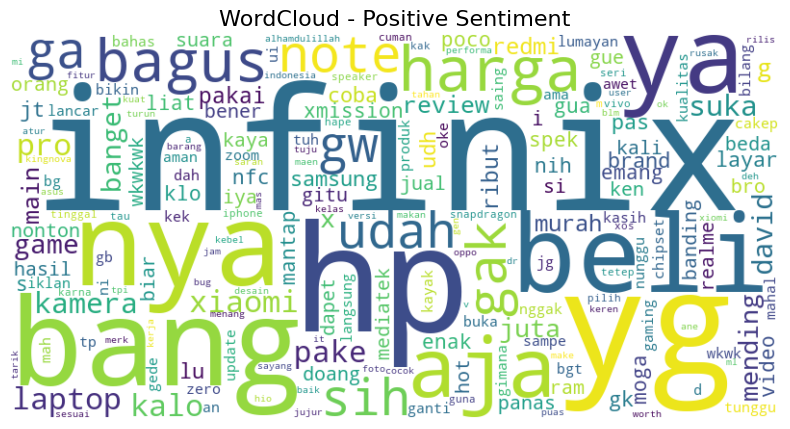

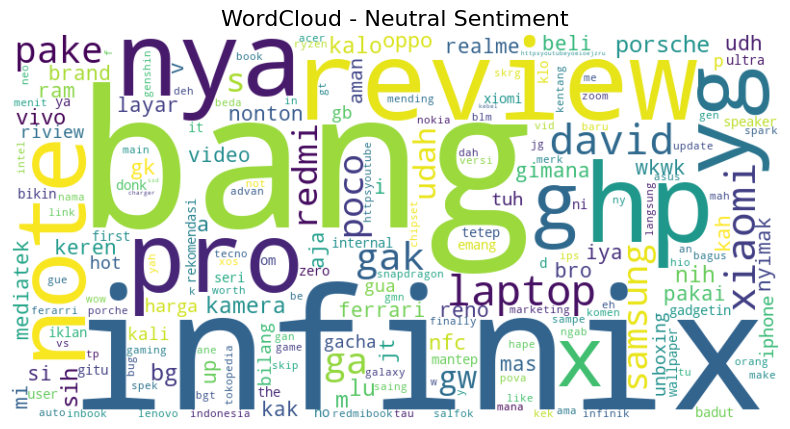

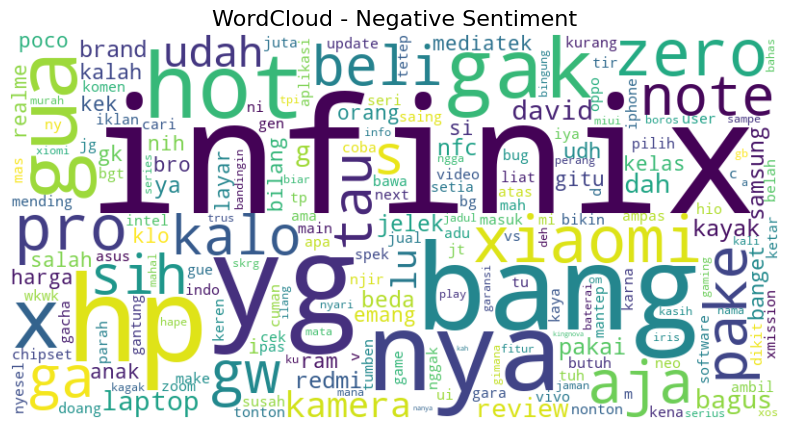

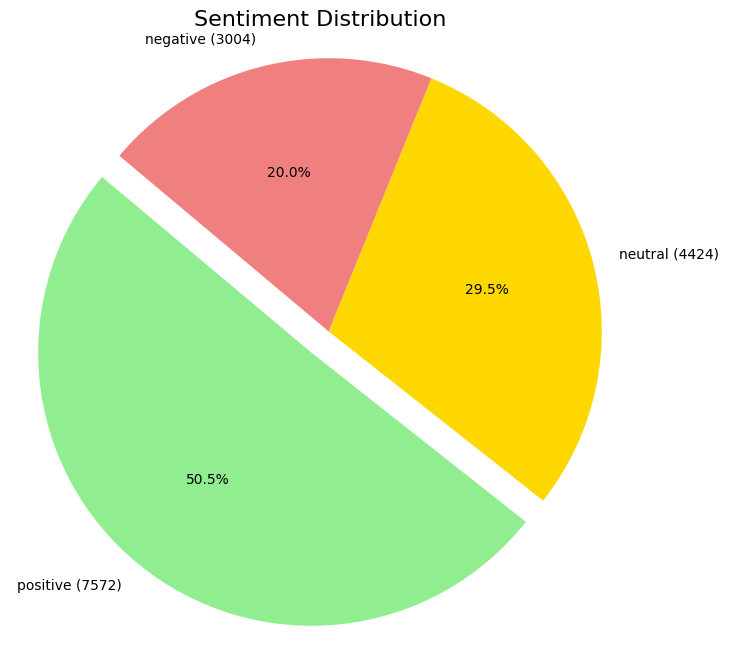

In [34]:

from wordcloud import WordCloud
from collections import Counter

import matplotlib.pyplot as plt

# Fungsi untuk menghitung frekuensi kata
def get_word_frequencies(tokens):
    all_words = [word for token_list in tokens for word in eval(token_list)]
    return Counter(all_words)

# Pisahkan data berdasarkan sentimen
positive_data = labeled_data[labeled_data['sentiment_label'] == 'positive']
neutral_data = labeled_data[labeled_data['sentiment_label'] == 'neutral']
negative_data = labeled_data[labeled_data['sentiment_label'] == 'negative']

# Hitung frekuensi kata untuk setiap kategori
positive_frequencies = get_word_frequencies(positive_data['tokens'])
neutral_frequencies = get_word_frequencies(neutral_data['tokens'])
negative_frequencies = get_word_frequencies(negative_data['tokens'])

# Fungsi untuk membuat WordCloud
def plot_wordcloud(frequencies, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Tampilkan WordCloud untuk setiap kategori
plot_wordcloud(positive_frequencies, "WordCloud - Positive Sentiment")
plot_wordcloud(neutral_frequencies, "WordCloud - Neutral Sentiment")
plot_wordcloud(negative_frequencies, "WordCloud - Negative Sentiment")

# Fungsi untuk membuat Pie Chart dengan informasi jumlah real
def plot_sentiment_pie_chart(data, title):
    sentiment_counts = data['sentiment_label'].value_counts()
    labels = [f"{label} ({count})" for label, count in zip(sentiment_counts.index, sentiment_counts.values)]
    sizes = sentiment_counts.values
    colors = ['lightgreen', 'gold', 'lightcoral']
    explode = (0.1, 0, 0)  # Hanya meledakkan bagian pertama (positive)

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(title, fontsize=16)
    plt.axis('equal')  # Pastikan pie chart berbentuk lingkaran
    plt.show()

    

# Tampilkan Pie Chart untuk distribusi sentimen
plot_sentiment_pie_chart(labeled_data, "Sentiment Distribution")

# Data Splitting dan Ekstraksi Fitur dengan TF-IDF

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the labeled data from the specified path
data = pd.read_csv("labeled_comments.csv")

# Split the data into training and testing sets
X = data['processed_text'].fillna('')  # Use processed_text as features, handle NaN values
y = data['sentiment_label']  # Use sentiment_label as target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features

# Fit and transform the training data, transform the testing data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the shape of the resulting matrices
print(f"Training data shape: {X_train_tfidf.shape}")
print(f"Testing data shape: {X_test_tfidf.shape}")